In [1]:
import sys
from mpasanalysis import *
%matplotlib inline

In [2]:
# mesh_file = '/Users/qingli/data/mpas/test/super-parameterization/sp_mixed_layer_eddy_summit/output.0000-01-01_00.00.00.nc'
mesh_file = '/Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc'
data_file = mesh_file

In [3]:
mpas_data = MPASOData(filepath=data_file, filepath_mesh=mesh_file)

In [4]:
def plot_hlines(yfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    ymin, ymax = axis.get_ylim()
    yf = ymin+yfrac*(ymax-ymin)
    plt.axhline(yf, **kwargs)
def plot_vlines(xfrac, axis=None, **kwargs):
    if axis is None:
        axis = plt.gca()
    xmin, xmax = axis.get_xlim()
    xf = xmin+xfrac*(xmax-xmin)
    plt.axvline(xf, **kwargs)

In [5]:
def plot_snapshot(varname, tidx, zidx=0, name=None, units=None,
                  position='cell', levels=None, xfrac=None, yfrac=None, **kwargs):
    data = mpas_data.get_domain(varname=varname, position=position, name=name, units=units, tidx=tidx)
    # xy view
    fig_xy = plt.figure(figsize=[12,10])
    data.plot_xy(ptype='contourf', levels=levels, zidx=zidx, **kwargs)
    axis = plt.gca()
    if xfrac is not None:
        plot_vlines(xfrac, axis=axis, color='k')
    if yfrac is not None:
        plot_hlines(yfrac, axis=axis, color='k')
    
    # cross front
    if xfrac is not None:
        plt.figure(figsize=[12,6])
        data.plot_yz(xfrac=xfrac, ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    else:
        plt.figure(figsize=[12,6])
        data.plot_yz_mean(ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    # along front
    if yfrac is not None:
        plt.figure(figsize=[12,6])
        data.plot_xz(yfrac=yfrac, ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
    else:
        plt.figure(figsize=[12,6])
        data.plot_xz_mean(ptype='contourf', levels=levels, **kwargs)
#         plt.ylim([-80,0])
        
    

In [6]:
# location of transectj
xfrac = 0.5
yfrac = 0.5

## Initial condition

### Temperature 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Nearest neighbor interpolation to 109 points.
Nearest neighbor interpolation to 129 points.


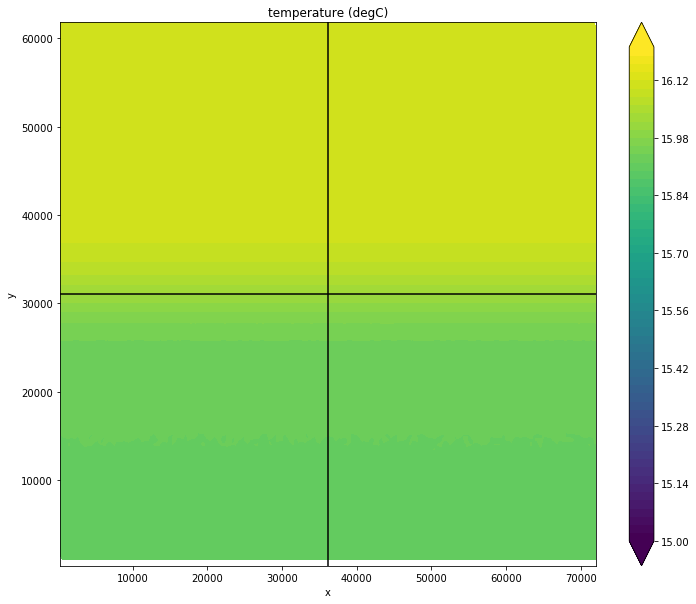

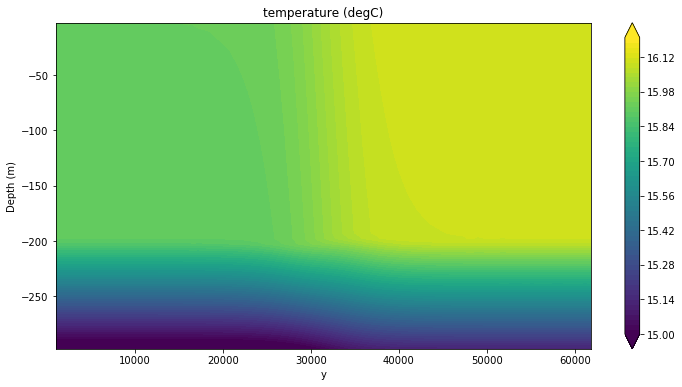

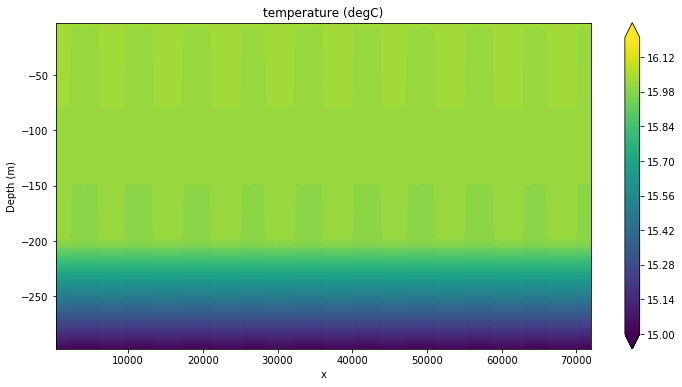

In [7]:
levels=np.linspace(15,16.2,61)
plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
              levels=levels, tidx=0, xfrac=xfrac, yfrac=yfrac)
# plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
#               levels=levels, tidx=-1)

### Salinity

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Average over x at 109 bins in y.
Average over y at 129 bins in x.


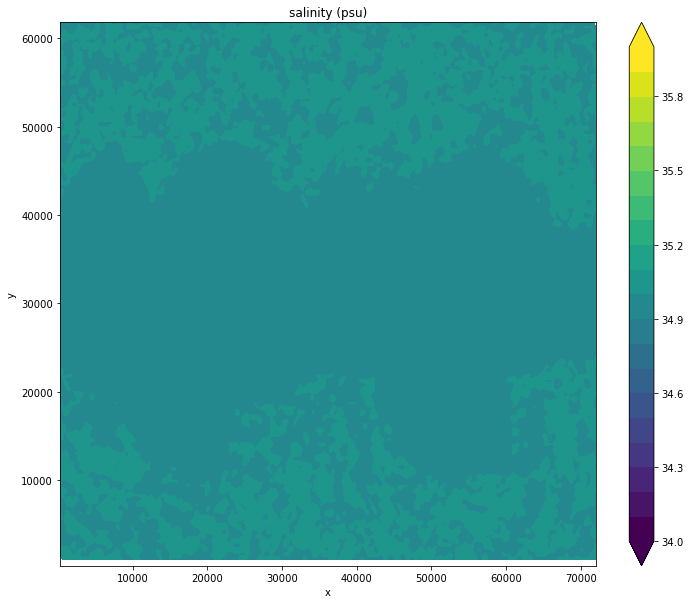

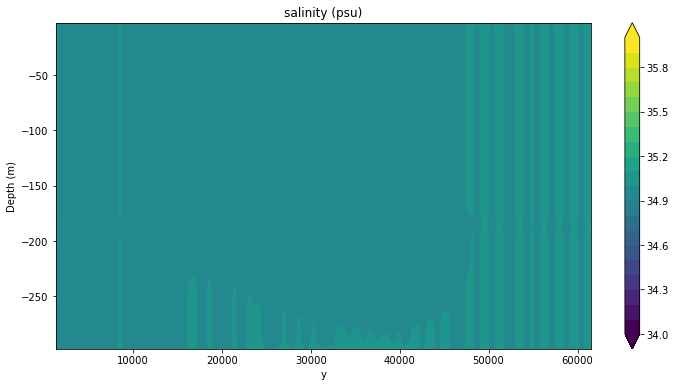

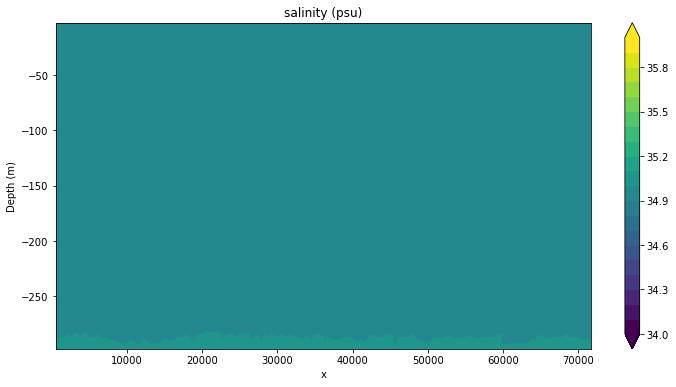

In [8]:
levels=np.linspace(34,36,21)
plot_snapshot(varname='salinity', position='cell', name='salinity', units='psu',
              levels=levels, tidx=-1)

### Kinetic energy 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Average over x at 109 bins in y.
Average over y at 129 bins in x.


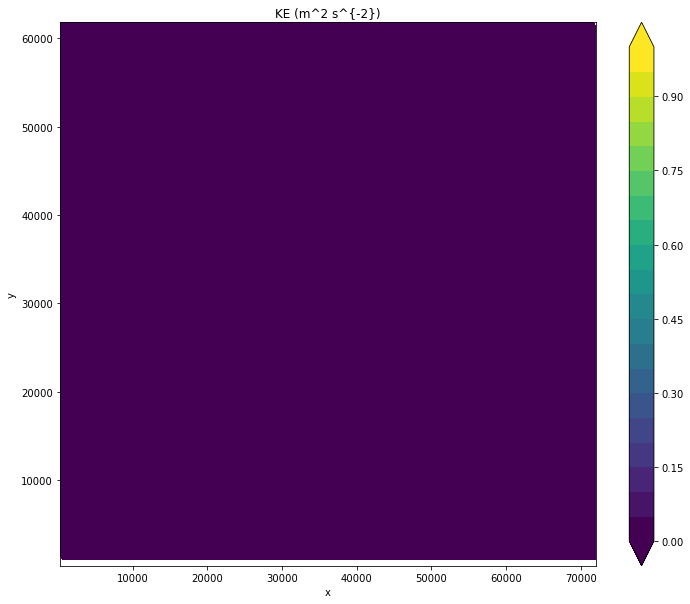

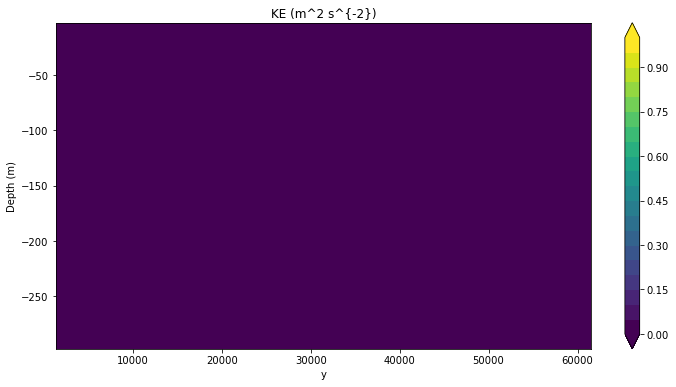

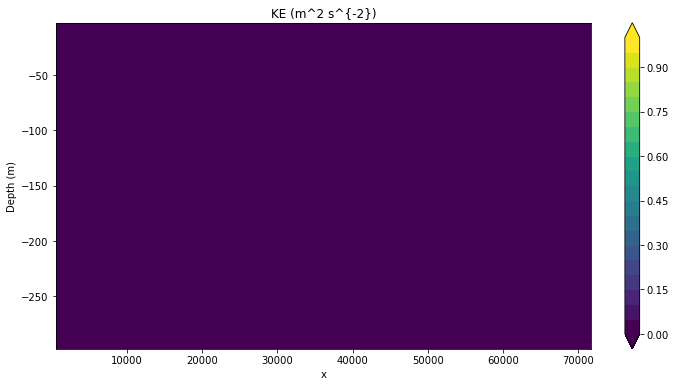

In [9]:
levels=np.linspace(0,1,21)
plot_snapshot(varname='kineticEnergyCell', position='cell', name='KE', units='m^2 s^{-2}', levels=levels, tidx=0)

## Snapshot 

In [10]:
# time index
tidx = -1

### Temperature 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Average over x at 109 bins in y.
Average over y at 129 bins in x.


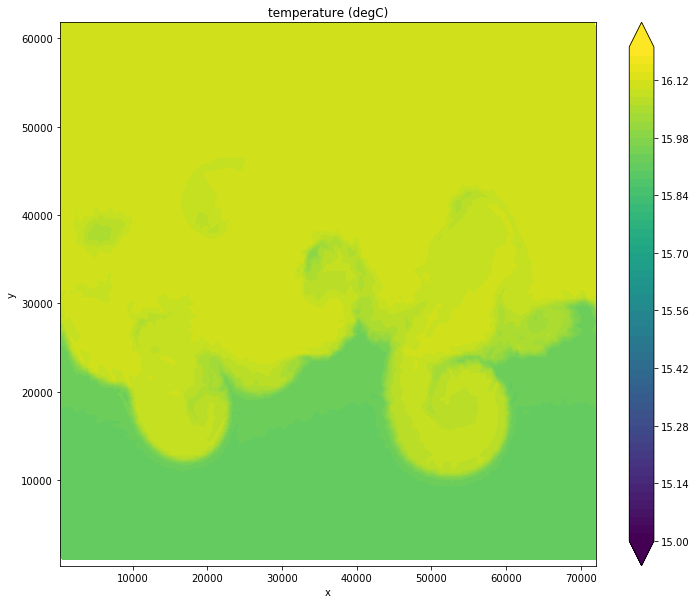

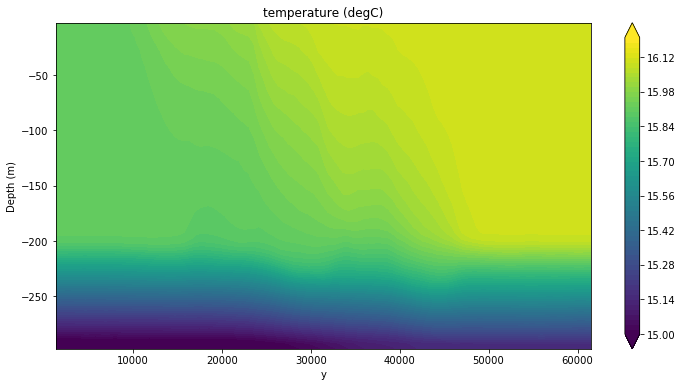

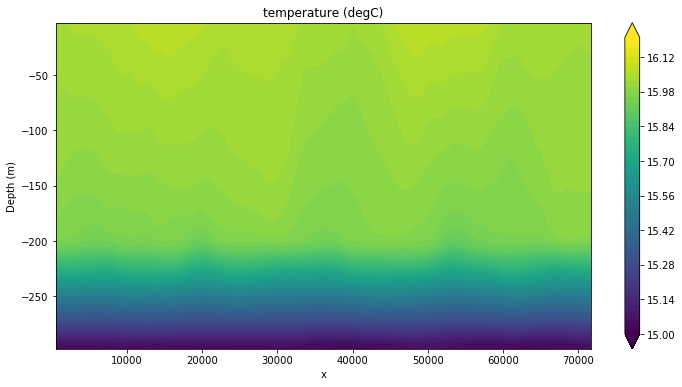

In [18]:
levels=np.linspace(15,16.2,61)
# plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
#               levels=levels, tidx=tidx, xfrac=xfrac, yfrac=yfrac)
plot_snapshot(varname='temperature', position='cell', name='temperature', units='degC',
              levels=levels, tidx=119)

### Relative vorticity

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Average over x at 109 bins in y.
Average over y at 129 bins in x.


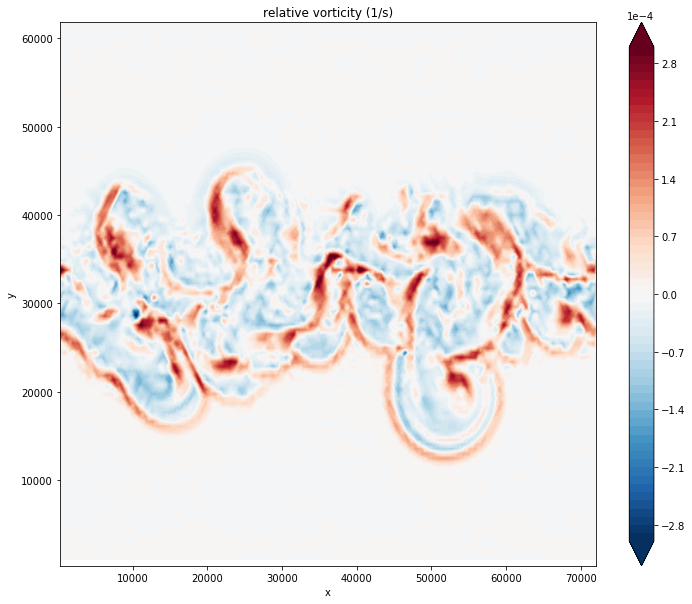

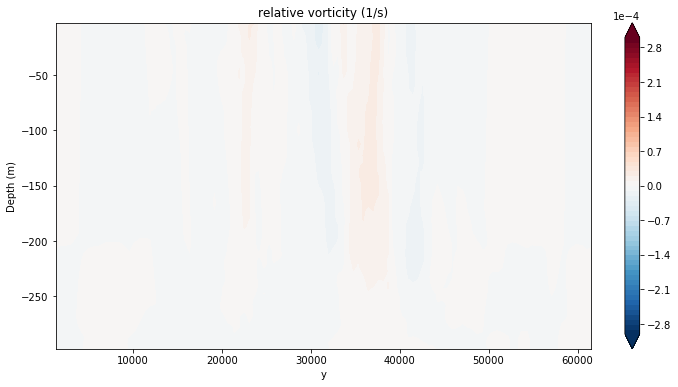

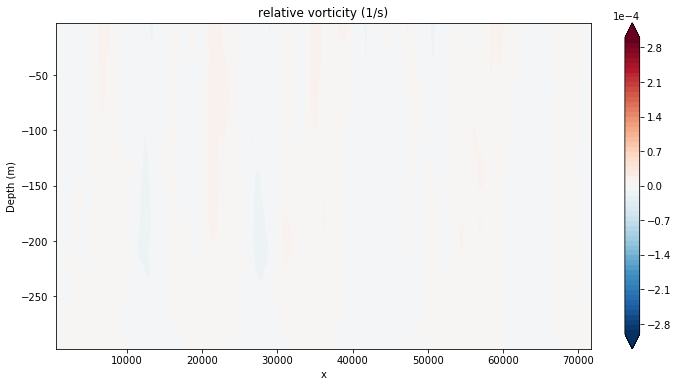

In [17]:
levels=np.linspace(-3e-4,3e-4,61)
# plot_snapshot(varname='relativeVorticityCell', position='cell', name='relative vorticity', units='1/s',
#               levels=levels, tidx=tidx, xfrac=xfrac, yfrac=yfrac, cmap='RdBu_r')
plot_snapshot(varname='relativeVorticityCell', position='cell', name='relative vorticity', units='1/s',
              levels=levels, tidx=110, cmap='RdBu_r')

### Kinetic energy 

Reading mesh data from /Users/qingli/scratch/superparameterization/sp_mixed_layer_eddy/output/output.0000-01-01_00.00.00.nc
Average over x at 109 bins in y.
Average over y at 129 bins in x.


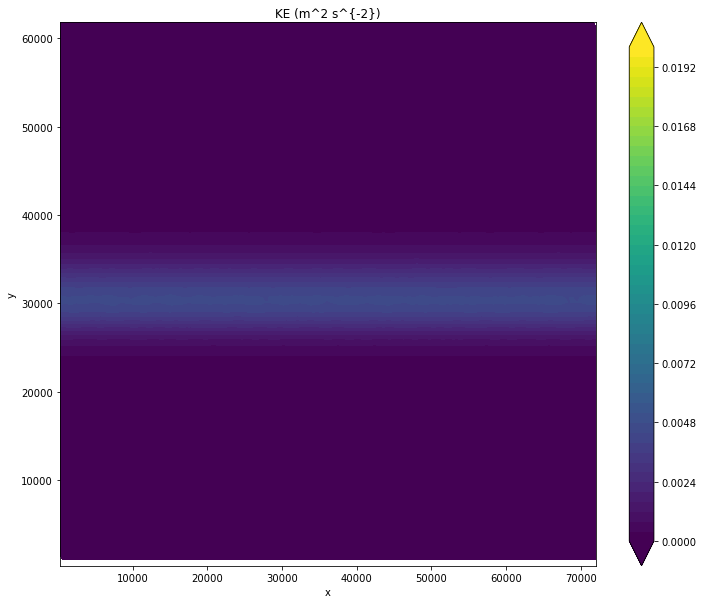

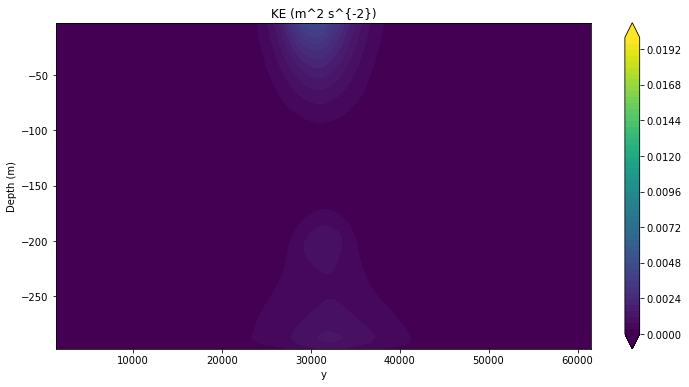

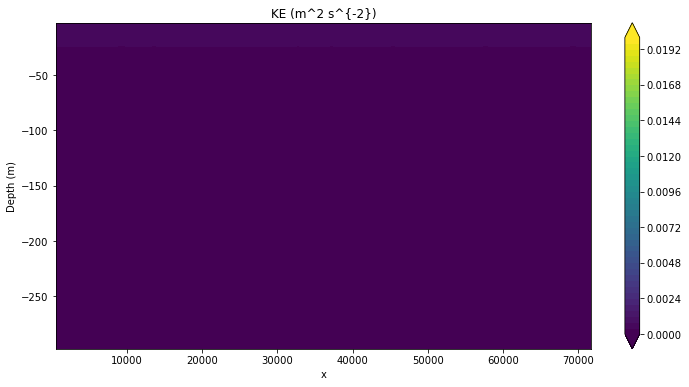

In [13]:
levels=np.linspace(0,2e-2,51)
# plot_snapshot(varname='kineticEnergyCell', position='cell', name='KE', units='m^2 s^{-2}',
#               levels=levels, tidx=tidx, xfrac=xfrac, yfrac=yfrac)
plot_snapshot(varname='kineticEnergyCell', position='cell', name='KE', units='m^2 s^{-2}',
              levels=levels, tidx=14)